In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
from datetime import datetime
from scipy.stats import pearsonr
from pandas import read_excel
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Importar a base de dados SP_1_14
df_1 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_1_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [195]:
# Importar a base de dados SP_2_14
df_2 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_2_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [196]:
# Importar a base de dados SP_3_14
df_3 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_3_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [197]:
# Importar a base de dados SP_4_14
df_4 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_4_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [198]:
# Importar a base de dados SP_5_14
df_5 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_5_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [199]:
# Importar a base de dados SP_6_14
df_6 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_6_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [200]:
# Importar a base de dados SP_7_14
df_7 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_7_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [201]:
# Importar a base de dados SP_8_14
df_8 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_8_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [202]:
# Importar a base de dados SP_9_14
df_9 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_9_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [203]:
# Importar a base de dados SP_10_14
df_10 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_10_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [204]:
# Importar a base de dados SP_11_14
df_11 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_11_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [205]:
# Importar a base de dados SP_12_14
df_12 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_12_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [206]:
# Importar a base de dados SP_13_14
df_13 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_13_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [207]:
# Importar a base de dados SP_14_14
df_14 = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/SP_14_14.csv", delimiter=';', skiprows=0, low_memory=False)

In [303]:
df = pd.concat([df_1, df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14])

In [3]:
df = df_1

In [4]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 42 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      500000 non-null  int64  
 1   CNPJ                    500000 non-null  int64  
 2   MATRIZ/FILIAL           500000 non-null  object 
 3   RAZAO SOCIAL            499999 non-null  object 
 4   NOME FANTASIA           361909 non-null  object 
 5   SIT CADASTRAL           500000 non-null  object 
 6   DATA SIT CADASTRAL      500000 non-null  object 
 7   MOTIVO SIT CADASTRAL    500000 non-null  object 
 8   NOME CIDADE EXTERIOR    0 non-null       float64
 9   COD PAIS                8604 non-null    float64
 10  NOME PAIS               8604 non-null    object 
 11  COD NATUREZA JURIDICA   500000 non-null  int64  
 12  DATA INICIO ATIVIDADE   500000 non-null  object 
 13  CNAE FISCAL             500000 non-null  object 
 14  CNAE CODIGO         

In [209]:
df.drop_duplicates(keep=False,inplace=True)

In [33]:
from datetime import date
df['DATA INICIO ATIVIDADE_ANO'] = df['DATA INICIO ATIVIDADE'].str[:4].astype(int)
df['DATA INICIO ATIVIDADE_MES'] = df['DATA INICIO ATIVIDADE'].str[5:7].astype(int)
df['DATA INICIO ATIVIDADE_DIA'] = df['DATA INICIO ATIVIDADE'].str[-2].astype(int)
df['DATA INICIO ATIVIDADE_DIAS'] =  df['DATA INICIO ATIVIDADE_ANO']*365 + df['DATA INICIO ATIVIDADE_MES'] * 12 + df['DATA INICIO ATIVIDADE_DIA']
df['TODAY'] = date.today().year * 365 + date.today().month*12 + date.today().day
df['TEMPO ATIVIDADE'] = (df['TODAY'] - df['DATA INICIO ATIVIDADE_DIAS']) / 365.25

In [5]:
df['SIT CADASTRAL'].value_counts()

ATIVA    500000
Name: SIT CADASTRAL, dtype: int64

In [6]:
df['UF'].value_counts()

SP    500000
Name: UF, dtype: int64

In [7]:
df['PORTE EMPRESA'].value_counts()

MICRO EMPRESA    447369
DEMAIS            33298
NAO INFORMADO     19333
Name: PORTE EMPRESA, dtype: int64

In [34]:
df['PORTE_MICRO'] = 0
df.loc[(df['PORTE EMPRESA']) == 'MICRO EMPRESA' , 'PORTE_MICRO'] = 1
df['PORTE_DEMAIS'] = 0
df.loc[(df['PORTE EMPRESA']) == 'DEMAIS' , 'PORTE_DEMAIS'] = 1
df['PORTE_N_INFO'] = 0
df.loc[(df['PORTE EMPRESA']) == 'NAO INFORMADO' , 'PORTE_N_INFO'] = 1

In [35]:
df.loc[(df['CNAES SECUNDARIOS']).isnull() == True , 'ATIVIDADE_SECUNDARIA'] = 0
df.loc[(df['CNAES SECUNDARIOS']).isnull() == False , 'ATIVIDADE_SECUNDARIA'] = 1

In [36]:
df['BRASIL'] = 0
df.loc[(df['NOME PAIS']).isnull() == True , 'BRASIL'] = 1
df.loc[(df['NOME PAIS']) == 'BRASIL' , 'BRASIL'] = 1

In [37]:
df['STATUS SIT ESPECIAL'] = 1
df.loc[(df['SIT ESPECIAL']).isnull() == True , 'STATUS SIT ESPECIAL'] = 0

In [38]:
df['SIMPLES'] = 1
df.loc[(df['OPCAO SIMPLES']).isnull() == True , 'SIMPLES'] = 0
df.loc[(df['OPCAO SIMPLES']) == 'NAO OPTANTE' , 'SIMPLES'] = 0

In [39]:
df['MEI'] = 1
df.loc[(df['OPCAO MEI']).isnull() == True , 'MEI'] = 0
df.loc[(df['OPCAO MEI']) == 'N' , 'MEI'] = 0

In [40]:
df['MATRIZ'] = 1
df.loc[(df['MATRIZ/FILIAL']) == 'FILIAL' , 'MATRIZ'] = 0

In [41]:
df_natjur = pd.read_excel("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/CODIGOS/tabnatjur1995.xls")
df_natjur = df_natjur.iloc[:, [0, 1]]
df_natjur.columns = ['COD NATUREZA JURIDICA', 'NATUREZA JURIDICA']
df_natjur = df_natjur.dropna()
df_natjur['COD NATUREZA JURIDICA'] = df_natjur['COD NATUREZA JURIDICA'].str.replace('-','').astype(np.int64)

In [42]:
df= df.merge(df_natjur, on='COD NATUREZA JURIDICA', how='left')

In [43]:
#CNAE - Classificação Nacional de Atividades Econômicas 
df_cnae = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/CONSULTA_PRONTA/CODIGOS/CNAE_Tratamento.csv", delimiter=',', skiprows=0, low_memory=False)
df_cnae['CNAE CODIGO'] = df_cnae['CNAE CODIGO'].str.replace('*','').astype(np.int64)

C:\Users\MARIAT~1\AppData\Local\Temp/ipykernel_8428/1869565413.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_cnae['CNAE CODIGO'] = df_cnae['CNAE CODIGO'].str.replace('*','').astype(np.int64)


In [44]:
df = df.merge(df_cnae, on='CNAE CODIGO', how='left')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520314 entries, 0 to 520313
Data columns (total 61 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          520314 non-null  int64  
 1   CNPJ                        520314 non-null  int64  
 2   MATRIZ/FILIAL               520314 non-null  object 
 3   RAZAO SOCIAL                520313 non-null  object 
 4   NOME FANTASIA               377719 non-null  object 
 5   SIT CADASTRAL               520314 non-null  object 
 6   DATA SIT CADASTRAL          520314 non-null  object 
 7   MOTIVO SIT CADASTRAL        520314 non-null  object 
 8   NOME CIDADE EXTERIOR        0 non-null       float64
 9   COD PAIS                    8790 non-null    float64
 10  NOME PAIS                   8790 non-null    object 
 11  COD NATUREZA JURIDICA       520314 non-null  int64  
 12  DATA INICIO ATIVIDADE       520314 non-null  object 
 13  CNAE FISCAL   

In [46]:
    #TESTE RECONHECIMENTO POPULAÇÃO 
    # Selecionar as variáveis quantitativas
    var_num = df.iloc[:, [32, 47]]
    var_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520314 entries, 0 to 520313
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CAPITAL SOCIAL EMPRESA  520314 non-null  float64
 1   TEMPO ATIVIDADE         520314 non-null  float64
dtypes: float64(2)
memory usage: 11.9 MB


In [27]:
#TESTE RECONHECIMENTO POPULAÇÃO #ESTOU AQUI!!!
# Selecionar as variáveis quantitativas
var_cat = df.iloc[:, [5, 8, 10, 16, 17, 19]]
var_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 520314 entries, 0 to 520313
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   SIT CADASTRAL         520314 non-null  object 
 1   NOME PAIS             8790 non-null    object 
 2   QUALIF RESPONSAVEL    108961 non-null  float64
 3   PORTE EMPRESA         520314 non-null  object 
 4   ATIVIDADE_SECUNDARIA  520314 non-null  float64
 5   NATUREZA JURIDICA     496422 non-null  object 
 6   CNAE                  497220 non-null  object 
 7   SECAO DESC            497220 non-null  object 
dtypes: float64(2), object(6)
memory usage: 35.7+ MB


In [28]:
var_cat.head()

,SIT CADASTRAL,NOME PAIS,QUALIF RESPONSAVEL,PORTE EMPRESA,ATIVIDADE_SECUNDARIA,NATUREZA JURIDICA,CNAE,SECAO DESC
0,ATIVA,NaN,NaN,MICRO EMPRESA,0.0,FIRMA MERCANTIL INDIVIDUAL,Promoção de vendas,Seção M - Atividades profissionais científicas...
1,ATIVA,NaN,NaN,MICRO EMPRESA,0.0,FIRMA MERCANTIL INDIVIDUAL,Cabeleireiros,Seção S - Outras atividades de serviços
2,ATIVA,NaN,NaN,MICRO EMPRESA,0.0,FIRMA MERCANTIL INDIVIDUAL,Outras atividades de ensino não especificadas ...,Seção P - Educação
3,ATIVA,NaN,NaN,MICRO EMPRESA,1.0,FIRMA MERCANTIL INDIVIDUAL,Comércio varejista de calçados,Seção G - Comércio; reparação de veículos auto...
4,ATIVA,NaN,NaN,MICRO EMPRESA,0.0,FIRMA MERCANTIL INDIVIDUAL,Serviços de entrega rápida,Seção H - Transporte armazenagem e correio


In [24]:
df['ATIVIDADE_SECUNDARIA'].value_counts()      

1.0    272226
0.0    248088
Name: ATIVIDADE_SECUNDARIA, dtype: int64

In [229]:
df['STATUS SIT ESPECIAL'].value_counts() 

0    6767928
Name: STATUS SIT ESPECIAL, dtype: int64

In [230]:
df['BRASIL'].value_counts() 

1    6767829
0         99
Name: BRASIL, dtype: int64

In [231]:
df['SECAO DESC'].value_counts() 

Seção G - Comércio; reparação de veículos automotores e motocicletas        1635880
Seção A - Agricultura pecuária produção florestal pesca e aqüicultura        644676
Seção S - Outras atividades de serviços                                      633607
Seção N - Atividades administrativas e serviços complementares               538015
Seção I - Alojamento e alimentação                                           432466
Seção F - Construção                                                         429685
Seção H - Transporte armazenagem e correio                                   427440
Seção C - Indústrias de transformação                                        424007
Seção M - Atividades profissionais científicas e técnicas                    405447
Seção P - Educação                                                           220986
Seção Q - Saúde humana e serviços sociais                                    183349
Seção J - Informação e comunicação                                          

In [232]:
df['SIMPLES'].value_counts() 

0    6767928
Name: SIMPLES, dtype: int64

In [233]:
df['MEI'].value_counts()

0    3492520
1    3275408
Name: MEI, dtype: int64

In [234]:
df['NATUREZA JURIDICA'].value_counts()

FIRMA MERCANTIL INDIVIDUAL                                             3998411
SOCIEDADE POR QUOTAS DE RESPONSABILIDADE LIMITADA                      1376478
OUTRAS FORMAS DE ORGANIZAÇÃO SEM FINS LUCRATIVO                         104978
SOCIEDADE ANONIMA DE CAPITAL FECHADO                                     40363
SOCIEDADE ANONIMA DE CAPITAL ABERTO COM CONTROLE ACIONARIO PRIVADO       14682
SOCIEDADE EM CONTA DE PARTICIPAÇÃO                                        9103
COOPERATIVA                                                               5487
CONSORCIO DE EMPRESAS                                                     4402
EMPRESA PUBLICA - SOCIEDADE POR QUOTAS DE RESPONSABILIDADE LIMITADA       2761
SOCIEDADE ANONIMA DE CAPITAL ABERTO COM CONTROLE ACIONÁRIO ESTATAL        2494
CARTORIO                                                                  1847
PESSOA FISICA EQUIPARADA A JURIDICA                                       1779
PODER EXECUTIVO ESTADUAL                            

In [235]:
#QUALIFICAÇÃO DO RESPONSÁVEL
df_quals = pd.read_csv("C:/Users/Maria Tereza Boada/Desktop/RECEITA/DOWNLOAD_RECEITA/QUALIFICACOES/F.K03200$Z.D20108.QUALS.csv", delimiter=';', skiprows=0, low_memory=False , encoding='latin-1')
df_quals

,QUALIF RESPONSAVEL,QUALIF RESPONSAVEL DESC
0,0,Não informada
1,5,Administrador
2,8,Conselheiro de Administração
3,9,Curador
4,10,Diretor
...,...,...
63,73,Presidente Residente ou Domiciliado no Exterior
64,74,Sócio-Administrador Residente ou Domiciliado n...
65,75,Fundador Residente ou Domiciliado no Exterior
66,78,Titular Pessoa Jurídica Domiciliada no Brasil


In [236]:
df = df.merge(df_quals, on='QUALIF RESPONSAVEL', how='left')
df

,SIT CADASTRAL,CNAE CODIGO,QUALIF RESPONSAVEL,CAPITAL SOCIAL EMPRESA,PORTE EMPRESA,TEMPO ATIVIDADE,PORTE_MICRO,PORTE_DEMAIS,PORTE_N_INFO,ATIVIDADE_SECUNDARIA,BRASIL,STATUS SIT ESPECIAL,SIMPLES,MEI,MATRIZ,NATUREZA JURIDICA,CNAE,SECAO,SECAO DESC,QUALIF RESPONSAVEL DESC
0,ATIVA,7319002,NaN,49.00000,MICRO EMPRESA,0.71184,1,0,0,0.00000,1,0,0,1,1,FIRMA MERCANTIL INDIVIDUAL,Promoção de vendas,M,Seção M - Atividades profissionais científicas...,NaN
1,ATIVA,9602501,NaN,10.00000,MICRO EMPRESA,0.71184,1,0,0,0.00000,1,0,0,1,1,FIRMA MERCANTIL INDIVIDUAL,Cabeleireiros,S,Seção S - Outras atividades de serviços,NaN
2,ATIVA,8599699,NaN,10.00000,MICRO EMPRESA,0.71184,1,0,0,0.00000,1,0,0,1,1,FIRMA MERCANTIL INDIVIDUAL,Outras atividades de ensino não especificadas ...,P,Seção P - Educação,NaN
3,ATIVA,4782201,NaN,20.00000,MICRO EMPRESA,0.71184,1,0,0,1.00000,1,0,0,1,1,FIRMA MERCANTIL INDIVIDUAL,Comércio varejista de calçados,G,Seção G - Comércio; reparação de veículos auto...,NaN
4,ATIVA,5320202,NaN,10.00000,MICRO EMPRESA,0.71184,1,0,0,0.00000,1,0,0,1,1,FIRMA MERCANTIL INDIVIDUAL,Serviços de entrega rápida,H,Seção H - Transporte armazenagem e correio,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767923,ATIVA,9900800,NaN,0.00000,DEMAIS,120.99384,0,1,0,0.00000,0,0,0,0,1,NaN,Organismos internacionais e outras instituiçõe...,T,Seção T - Serviços domésticos,NaN
6767924,ATIVA,6912500,NaN,0.00000,DEMAIS,120.99384,0,1,0,0.00000,1,0,0,0,1,CARTORIO,Cartórios,M,Seção M - Atividades profissionais científicas...,NaN
6767925,ATIVA,6462000,10.00000,10000.00000,DEMAIS,122.89117,0,1,0,0.00000,1,0,0,0,1,SOCIEDADE ANONIMA DE CAPITAL FECHADO,Holdings de instituições não-financeiras,K,Seção K - Atividades financeiras de seguros e ...,Diretor
6767926,ATIVA,133402,NaN,0.00000,DEMAIS,420.78850,0,1,0,1.00000,1,0,0,0,1,NaN,Agricultura pecuária produção florestal pesca ...,A,Seção A - Agricultura pecuária produção flores...,NaN


In [237]:
df['QUALIF RESPONSAVEL DESC'].value_counts()

Sócio-Administrador                                                      1301642
Titular Pessoa Física Residente ou Domiciliado no Brasil                  310362
Produtor Rural                                                            155745
Presidente                                                                139528
Sócio                                                                      97051
Administrador                                                              65213
Diretor                                                                    55827
Sócio Pessoa Jurídica Domiciliado no Exterior                              10851
Sócio-Gerente                                                               5172
Conselheiro de Administração                                                3843
Sociedade Consorciada                                                       1296
Sócio Ostensivo                                                             1224
Sócio Menor (Assistido/Repre

In [238]:
df['QUAL_PROD_RURAL'] = 0
df.loc[df['QUALIF RESPONSAVEL DESC'] == "Produtor Rural",'QUAL_PROD_RURAL']= 1

In [239]:
df['NAT_JURIDICA_COOP'] = 0
df.loc[df['NATUREZA JURIDICA'] == "COOPERATIVA",'NAT_JURIDICA_COOP']= 1

In [240]:
df['SECAO_AGRO'] = 0
df.loc[df['SECAO DESC'] == "Seção A - Agricultura pecuária produção florestal pesca e aqüicultura",'SECAO_AGRO']= 1

In [241]:
df['SIT_CAD_ATIVA'] = 0
df.loc[df['SIT CADASTRAL'] == "ATIVA",'SIT_CAD_ATIVA'] = 1

In [242]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
by_factory = df.groupby("PORTE EMPRESA")["CAPITAL SOCIAL EMPRESA"].mean()
by_factory

PORTE EMPRESA
DEMAIS          4794945.11368
MICRO EMPRESA      2010.97589
NAO INFORMADO      1894.74315
Name: CAPITAL SOCIAL EMPRESA, dtype: float64

In [243]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['CAPITAL SOCIAL EMPRESA'].describe()

count       6767928.00000
mean         985660.15389
std        34695711.82822
min               0.00000
25%               1.00000
50%              20.00000
75%             100.00000
max     10000000000.00000
Name: CAPITAL SOCIAL EMPRESA, dtype: float64

<AxesSubplot:xlabel='CAPITAL SOCIAL EMPRESA'>

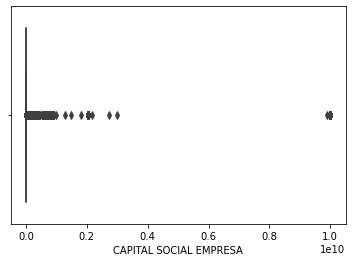

In [244]:
sns.boxplot(x=df['CAPITAL SOCIAL EMPRESA'])

In [251]:
minimo = min(df['CAPITAL SOCIAL EMPRESA'])   
P1 =  np.percentile(df['CAPITAL SOCIAL EMPRESA'], 97)
P2 =  np.percentile(df['CAPITAL SOCIAL EMPRESA'], 98)
P3 =  np.percentile(df['CAPITAL SOCIAL EMPRESA'], 99)
maximo = max(df['CAPITAL SOCIAL EMPRESA'])    
print(minimo, P1, P2, P3, maximo)


0.0 6000.0 19968.459999999963 199840.0 10000000000.0


In [253]:
# Criar a variável faixa de capital social
df['fx_cs_0'] = 0
df.loc[(df['CAPITAL SOCIAL EMPRESA'] >= minimo) & (df['CAPITAL SOCIAL EMPRESA'] <= P1), 'fx_cs_0']=1.0
df['fx_cs_1'] = 0
df.loc[(df['CAPITAL SOCIAL EMPRESA'] > P1) & (df['CAPITAL SOCIAL EMPRESA'] <= P2), 'fx_cs_1']=1.0
df['fx_cs_2'] = 0
df.loc[(df['CAPITAL SOCIAL EMPRESA'] > P2) & (df['CAPITAL SOCIAL EMPRESA'] <= P3), 'fx_cs_2']=1.0
df['fx_cs_3'] = 0
df.loc[(df['CAPITAL SOCIAL EMPRESA'] > P3) & (df['CAPITAL SOCIAL EMPRESA'] < maximo), 'fx_cs_3']=1.0
df['fx_cs_4'] = 0
df.loc[(df['CAPITAL SOCIAL EMPRESA'] < maximo), 'fx_cs_4']=1.0

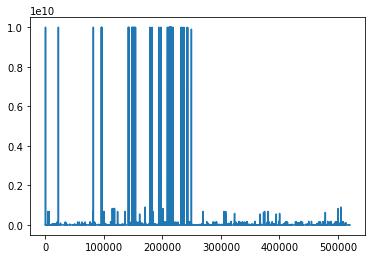

In [308]:
plt.plot(df['CAPITAL SOCIAL EMPRESA'])

In [261]:
minimo = min(df['TEMPO ATIVIDADE'])   
P1 =  1
P2 =  10
P3 =  20
maximo = max(df['TEMPO ATIVIDADE'])    
print(minimo, P1, P2, P3, maximo)


0.7118412046543463 1 10 20 822.3436002737851


In [262]:
# Criar a variável faixa de tempo de atividade
df['fx_ativ_0'] = 0
df.loc[(df['TEMPO ATIVIDADE'] >= minimo) & (df['TEMPO ATIVIDADE'] <= P1), 'fx_ativ_0']=1.0
df['fx_ativ_1'] = 0
df.loc[(df['TEMPO ATIVIDADE'] > P1) & (df['TEMPO ATIVIDADE'] <= P2), 'fx_ativ_1']=1.0
df['fx_ativ_2'] = 0
df.loc[(df['TEMPO ATIVIDADE'] > P2) & (df['TEMPO ATIVIDADE'] <= P3), 'fx_ativ_2']=1.0
df['fx_ativ_3'] = 0
df.loc[(df['TEMPO ATIVIDADE'] > P3), 'fx_ativ_3']=1.0

In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6767928 entries, 0 to 6767927
Data columns (total 33 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   SIT CADASTRAL            object 
 1   CNAE CODIGO              int64  
 2   QUALIF RESPONSAVEL       float64
 3   CAPITAL SOCIAL EMPRESA   float64
 4   PORTE EMPRESA            object 
 5   TEMPO ATIVIDADE          float64
 6   PORTE_MICRO              int64  
 7   PORTE_DEMAIS             int64  
 8   PORTE_N_INFO             int64  
 9   ATIVIDADE_SECUNDARIA     float64
 10  BRASIL                   int64  
 11  STATUS SIT ESPECIAL      int64  
 12  SIMPLES                  int64  
 13  MEI                      int64  
 14  MATRIZ                   int64  
 15  NATUREZA JURIDICA        object 
 16  CNAE                     object 
 17  SECAO                    object 
 18  SECAO DESC               object 
 19  QUALIF RESPONSAVEL DESC  object 
 20  QUAL_PROD_RURAL          int64  
 21  NAT_JURI

In [268]:
df = df.iloc[:, [6,7,8,9,10,12,13,14,20,21,22,23,24,25,26,27,28,29,30,31,32]]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6767928 entries, 0 to 6767927
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   PORTE_MICRO           int64  
 1   PORTE_DEMAIS          int64  
 2   PORTE_N_INFO          int64  
 3   ATIVIDADE_SECUNDARIA  float64
 4   BRASIL                int64  
 5   SIMPLES               int64  
 6   MEI                   int64  
 7   MATRIZ                int64  
 8   QUAL_PROD_RURAL       int64  
 9   NAT_JURIDICA_COOP     int64  
 10  SECAO_AGRO            int64  
 11  SIT_CAD_ATIVA         int64  
 12  fx_cs_0               int64  
 13  fx_cs_1               int64  
 14  fx_cs_2               int64  
 15  fx_cs_3               int64  
 16  fx_cs_4               int64  
 17  fx_ativ_0             int64  
 18  fx_ativ_1             int64  
 19  fx_ativ_2             int64  
 20  fx_ativ_3             int64  
dtypes: float64(1), int64(20)
memory usage: 1.1 GB


In [ ]:
#KMEANS https://www.youtube.com/watch?v=JZSYll1j6QA

In [269]:
#from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [270]:
x_train = df.values

In [271]:
kmeans = KMeans(n_clusters=5,random_state=540)

In [272]:
kmeans = kmeans.fit(x_train)

In [273]:
print("The clusters are:", kmeans.labels_)

The clusters are: [3 3 3 ... 1 1 2]


In [274]:
#o menor possível, pode ser usado para definir o número ótimo de clusters
print("The inertia is:", kmeans.inertia_)

The inertia is: 4986500.968199466


In [275]:
kmeans.labels_.shape

(6767928,)

In [276]:
#encontrar o número ótimo de clusters
no_of_clusters = range(2,10)
inertia = []

for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f,random_state=2)
    kmeans = kmeans.fit(x_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The inertia for:", f,"Clusters is:",u)

The inertia for: 2 Clusters is: 8359669.68894231
The inertia for: 3 Clusters is: 6741310.135719098
The inertia for: 4 Clusters is: 5898307.068900219
The inertia for: 5 Clusters is: 4986500.968199466
The inertia for: 6 Clusters is: 4395166.991026191
The inertia for: 7 Clusters is: 3758148.9092626832
The inertia for: 8 Clusters is: 3307332.1537531842
The inertia for: 9 Clusters is: 2964326.670880266


In [277]:
no_of_clusters

range(2, 10)

Text(0.5, 1.0, 'Inércia por Cluster')

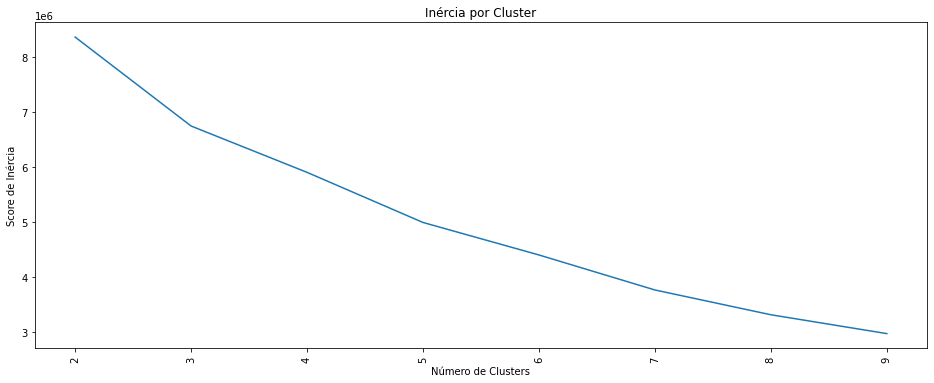

In [278]:
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation = 'vertical')
plt.xlabel('Número de Clusters')
plt.ylabel('Score de Inércia')
plt.title('Inércia por Cluster')

In [283]:
kmeans = KMeans(n_clusters=3,random_state=540)
kmeans = kmeans.fit(x_train)
kmeans.labels_

predictions = kmeans.predict(x_train)

unique, counts = np.unique(predictions, return_counts = True)
counts = counts.reshape(1,3)

countscldf = pd.DataFrame(counts, columns= ["Cluster 0", "Cluster 1","Cluster 2"])
countscldf

,Cluster 0,Cluster 1,Cluster 2
0,3275334,2102041,1390553


In [284]:
kmeans.labels_

array([0, 0, 0, ..., 2, 2, 1])

In [285]:
#precisa ser igual aos rótulos - step anterior
predictions

array([0, 0, 0, ..., 2, 2, 1])

In [286]:
from sklearn.preprocessing import StandardScaler

In [287]:
scaler = StandardScaler()

In [288]:
scaler.fit(x_train)

StandardScaler()

In [289]:
x_scaled = scaler.transform(x_train.data)

In [290]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import mglearn

In [291]:
x = x_train
y_num = predictions

In [292]:
target_names = ["Cluster 0", "Cluster 1","Cluster 2"]

In [293]:
pca = PCA(n_components = 2, random_state = 453)
x_r = pca.fit(x).transform(x)

In [294]:
print('Explained variance ratio (first two components): %s' % str(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.34205012 0.16115987]


<Figure size 432x288 with 0 Axes>

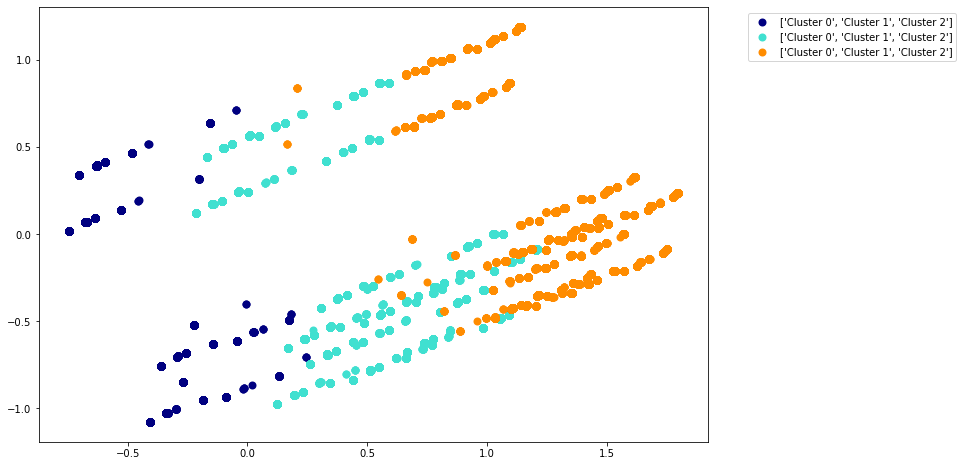

In [295]:
plt.figure()
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise', 'darkorange', 'red','yellow', 'blue', 'black', 'violet']
lw = 2
for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(x_r[y_num == i, 0], x_r[y_num == i, 1], color = color, lw = 2 , label = target_names)   
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad = 0.6)
plt.show()

In [296]:
df_predictions = pd.DataFrame(predictions,
                     columns=['predictions'])
df_cluster = pd.merge(df,df_predictions, left_index=True, right_index=True)
df_cluster 

,PORTE_MICRO,PORTE_DEMAIS,PORTE_N_INFO,ATIVIDADE_SECUNDARIA,BRASIL,SIMPLES,MEI,MATRIZ,QUAL_PROD_RURAL,NAT_JURIDICA_COOP,...,fx_cs_0,fx_cs_1,fx_cs_2,fx_cs_3,fx_cs_4,fx_ativ_0,fx_ativ_1,fx_ativ_2,fx_ativ_3,predictions
0,1,0,0,0.00000,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0
1,1,0,0,0.00000,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0
2,1,0,0,0.00000,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0
3,1,0,0,1.00000,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0
4,1,0,0,0.00000,1,0,1,1,0,0,...,1,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6767923,0,1,0,0.00000,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,2
6767924,0,1,0,0.00000,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,2
6767925,0,1,0,0.00000,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0,1,2
6767926,0,1,0,1.00000,1,0,0,1,0,0,...,1,0,0,0,1,0,0,0,1,2
